In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Dataset triplets_data

In [3]:
triplets_data = pd.read_csv('triplets_data.csv', index_col=0)
triplets_data.head()

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1


In [4]:
triplets_data.shape

(48373585, 3)

In [5]:
print(f'Количество уникальных пользователей {triplets_data.user_id.nunique()}')
print(f'Количество уникальных песен {triplets_data.song_id.nunique()}')

Количество уникальных пользователей 1019318
Количество уникальных песен 384546


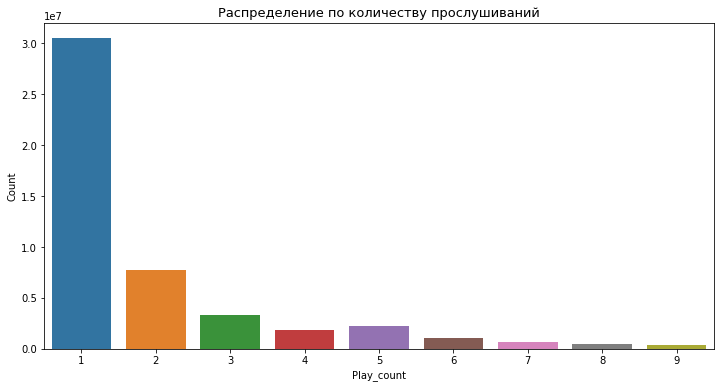

In [6]:
fig = plt.figure(figsize = (12, 6))

sns.countplot(x='play_count', data=triplets_data);

plt.title('Распределение по количеству прослушиваний', fontsize=13);
plt.ylabel('Count', fontsize=10);
plt.xlabel('Play_count',  fontsize=10);

In [7]:
song_count = triplets_data.groupby('user_id', as_index=False).agg({'song_id': 'count'}) \
                                                             .rename(columns={'song_id': 'count_song'}) \
                                                             .sort_values(by='count_song', ascending=False)
song_count.head()

,user_id,count_song
941420,ec6dfcf19485cb011e0b22637075037aae34cf26,4400
559999,8cb51abc6bf8ea29341cb070fe1e1af5e4c3ffcc,1651
1015155,fef771ab021c200187a419f5e55311390f850a50,1614
358880,5a3417a1955d9136413e0d293cd36497f5e00238,1604
768700,c1255748c06ee3f6440c51c439446886c7807095,1566


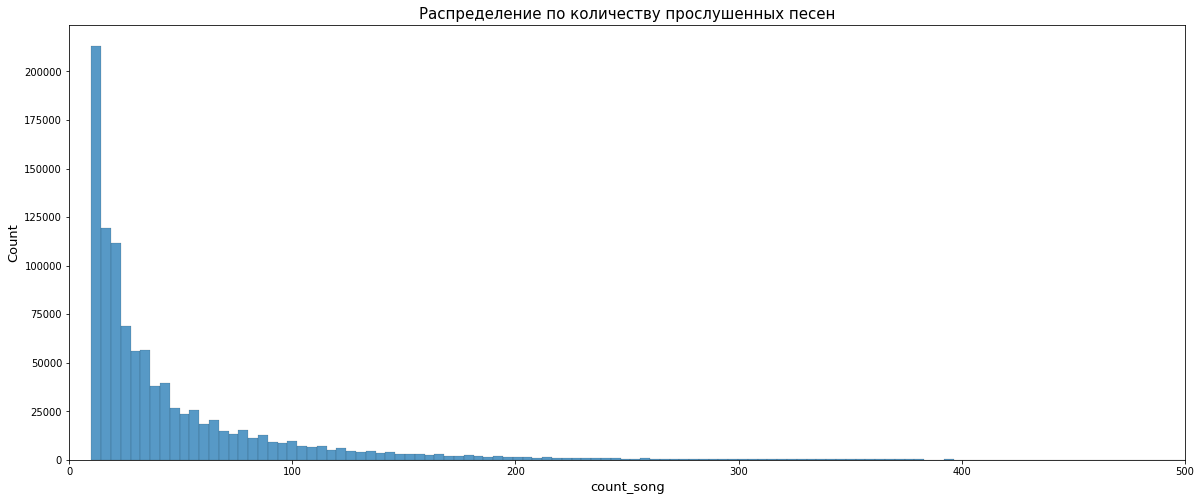

In [8]:
fig = plt.figure(figsize = (20, 8))

ax = sns.histplot(x='count_song', data=song_count, bins=1000);

plt.xlim(0, 500)

plt.title('Распределение по количеству прослушенных песен', fontsize=15);
plt.ylabel('Count', fontsize=13);
plt.xlabel('count_song',  fontsize=13);

### Dataset song_data

In [9]:
song_data = pd.read_csv('song_data.csv')

In [10]:
song_data.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [11]:
song_data.shape

(1000000, 5)

In [61]:
song_data.year[song_data.year > 0].min()

1922

In [68]:
print(f'Количество уникальных песен {song_data.song_id.nunique()}')
print(f'Количество уникальных исполнителей {song_data.artist_name.nunique()}')
print(f'Количество уникальных лет {song_data.year.nunique()}')
print(f'Минимальный год выхода трека {song_data.year[song_data.year > 0].min()}')
print(f'Максимальный год выхода трека {song_data.year[song_data.year > 0].max()}')
print(f'Количество треков, для которых определен год {song_data.song_id[song_data.year > 0].count()}')

Количество уникальных песен 980144
Количество уникальных исполнителей 69991
Количество уникальных лет 90
Минимальный год выхода трека 1922
Максимальный год выхода трека 2011
Количество треков, для которых определен год 503890


#### Удаляем дубли

In [13]:
song_data.groupby('song_id', as_index=False).agg({'artist_name': 'count'}).rename(columns={'artist_name': 'count_song_id'}) \
                                            .sort_values(by='count_song_id', ascending=False)

,song_id,count_song_id
824667,SOUYQYY12AF72A000F,3
476252,SOLNCTS12A8C1405EF,3
665418,SOQNMCD12A8C1383D4,3
68469,SOBPAEP12A58A77F49,3
827438,SOVASUH12A67021B44,3
...,...,...
333168,SOHXMHZ12A5891FFDF,1
333169,SOHXMIP12AAF3B3C24,1
333170,SOHXMJG12AB0182DA9,1
333171,SOHXMJO12AB018F837,1


In [14]:
song_data = song_data.drop_duplicates(['song_id'])
song_data.shape

(999056, 5)

### Удаление неверно объединенных пар song_id и track_id

In [15]:
song_data.shape

(999056, 5)

In [16]:
sid_mismatches = pd.read_csv('sid_mismatches.csv', index_col=0)

In [17]:
sid_mismatches.head()

,song_id,track_id
0,SOCMRBE12AB018C546,TRMMREB12903CEB1B1
1,SOLPHZY12AC468ABA8,TRMMBOC12903CEB46E
2,SONGHTM12A8C1374EF,TRMMITP128F425D8D0
3,SONGXCA12A8C13E82E,TRMMAYZ128F429ECE6
4,SOMBCRC12A67ADA435,TRMMNVU128EF343EED


In [18]:
sid_mismatches.shape

(19093, 2)

In [19]:
song_data.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [20]:
song_data.shape

(999056, 5)

In [21]:
song_data = song_data[~song_data.song_id.isin(sid_mismatches.song_id)]
song_data.shape

(980144, 5)

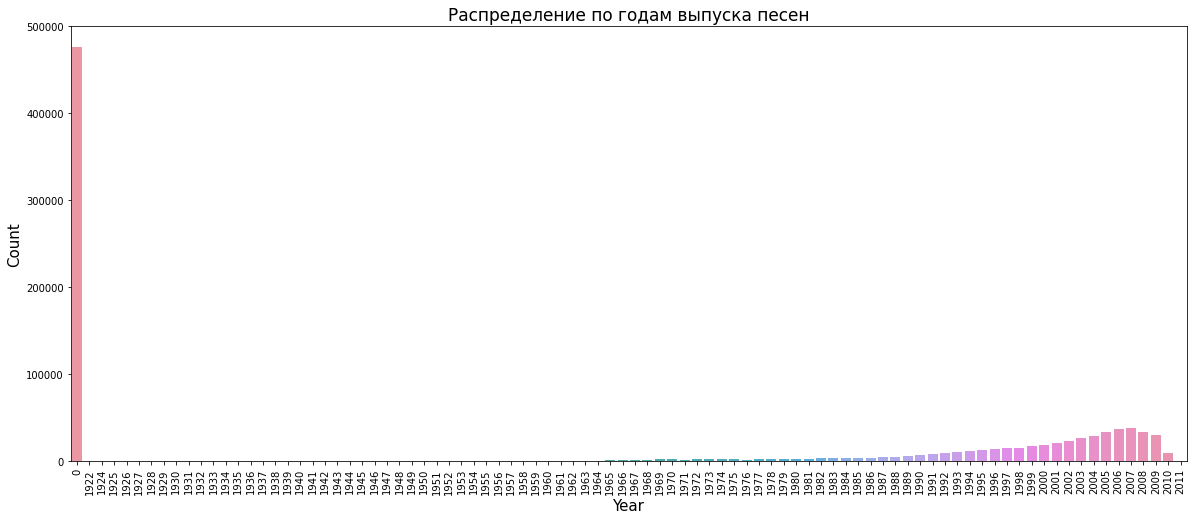

In [22]:
fig = plt.figure(figsize = (20, 8))

ax = sns.countplot(x='year', data=song_data);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.title('Распределение по годам выпуска песен', fontsize=17)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Year', fontsize=15);

### Dataset unique_tracks

In [23]:
unique_tracks = pd.read_csv('unique_tracks.csv', index_col=0)
unique_tracks.head()

,track_id,song_id,artist_name,song_title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [24]:
unique_tracks.shape

(1000000, 4)

In [25]:
print(f'Количество уникальных song_id {unique_tracks.song_id.nunique()}')
print(f'Количество уникальных track_id {unique_tracks.track_id.nunique()}')

Количество уникальных song_id 999056
Количество уникальных track_id 1000000


In [26]:
unique_tracks = unique_tracks.drop_duplicates(['song_id'])
unique_tracks.shape

(999056, 4)

In [27]:
unique_tracks = unique_tracks[~unique_tracks.song_id.isin(sid_mismatches.song_id) & \
                              ~unique_tracks.track_id.isin(sid_mismatches.track_id)]
unique_tracks.shape

(980144, 4)

### Добавляем жанры и стили

In [28]:
song_seed_genre = pd.read_csv('msd_beatunes_map.csv', index_col=0)
song_genre = pd.read_csv('msd-MAGD-genreAssignment.csv', index_col=0)
song_style = pd.read_csv('msd-MASD-styleAssignment.csv', index_col=0)

In [29]:
song_seed_genre.head()

,track_id,seed_genre
0,TRAAAAK128F9318786,Rock
1,TRAAAAV128F421A322,Rock
2,TRAAAAW128F429D538,Hip-Hop
3,TRAAAAY128F42A73F0,World
4,TRAAABD128F429CF47,Rock


In [30]:
song_seed_genre.shape

(677038, 2)

In [31]:
print(f'Количество уникальных жанров {song_seed_genre.seed_genre.nunique()}')

Количество уникальных жанров 6151


In [32]:
genre = song_seed_genre.seed_genre.value_counts().to_frame().reset_index() \
                                                  .rename(columns={'index': 'seed_genre', 'seed_genre': 'count'})
genre

,seed_genre,count
0,Rock,261242
1,Pop,57210
2,Electronic,38235
3,Jazz,37844
4,Hip-Hop,31580
...,...,...
6146,Future Soul,1
6147,aaUnknown Genre,1
6148,RUNNING TRACKS,1
6149,Funky Slow,1


In [33]:
genre = genre[genre['count'] >= 10]
genre

,seed_genre,count
0,Rock,261242
1,Pop,57210
2,Electronic,38235
3,Jazz,37844
4,Hip-Hop,31580
...,...,...
901,Cola Zouk,10
902,Irish Music,10
903,Down South,10
904,Synth Rock,10


In [34]:
song_seed_genre = song_seed_genre[song_seed_genre.seed_genre.isin(genre.seed_genre)]

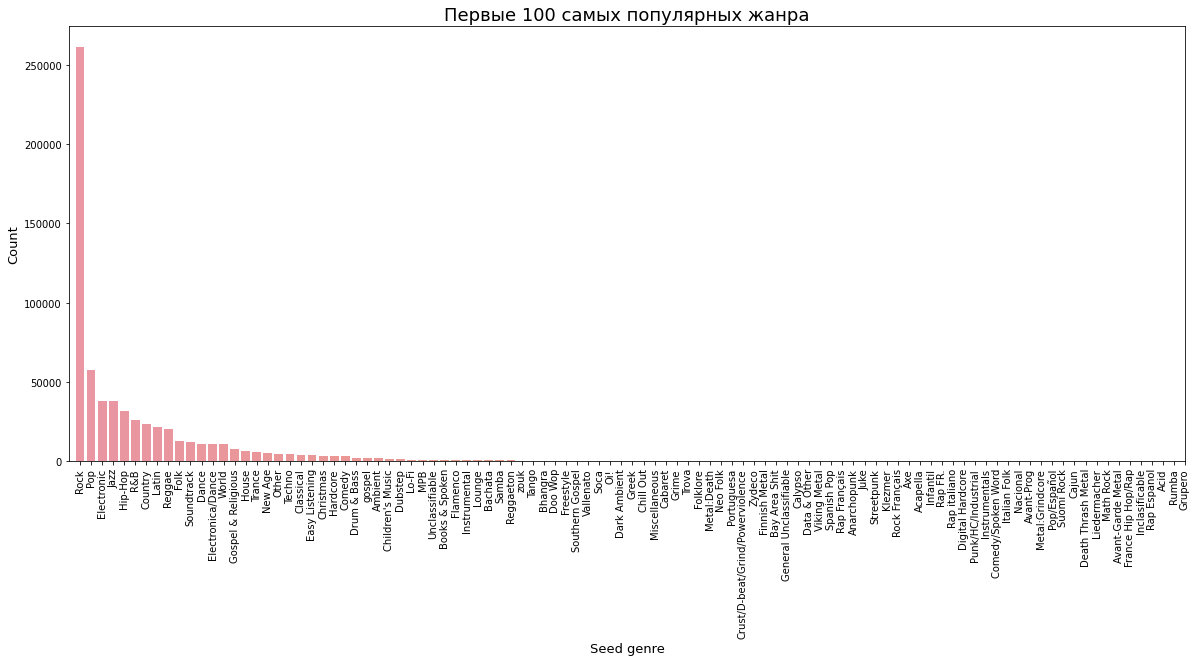

In [35]:
fig = plt.figure(figsize = (20, 8))

ax = sns.barplot(x='seed_genre', y='count', data=genre);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.xlim(-1, 100)

plt.title('Первые 100 самых популярных жанра', fontsize=18)
plt.ylabel('Count', fontsize=13);
plt.xlabel('Seed genre', fontsize=13);

In [36]:
song_genre.head()

,track_id,genre
0,TRAAAAK128F9318786,Pop_Rock
1,TRAAAAV128F421A322,Pop_Rock
2,TRAAAAW128F429D538,Rap
3,TRAAABD128F429CF47,Pop_Rock
4,TRAAACV128F423E09E,Pop_Rock


In [37]:
song_genre.shape

(422714, 2)

In [70]:
print(f'Количество уникальных жанров {song_genre.genre.nunique()}')

Количество уникальных жанров 21


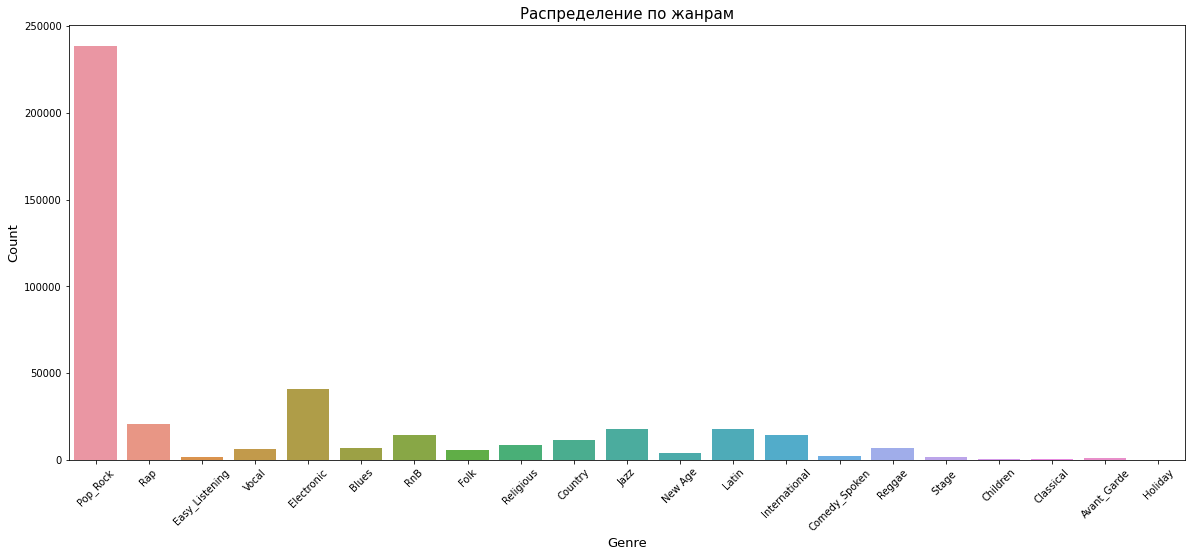

In [38]:
fig = plt.figure(figsize = (20, 8))

ax = sns.countplot(x='genre', data=song_genre);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

plt.title('Распределение по жанрам', fontsize=15)
plt.ylabel('Count', fontsize=13);
plt.xlabel('Genre', fontsize=13);

In [39]:
song_style.head()

,track_id,style
0,TRAAAAK128F9318786,Metal_Alternative
1,TRAAAAV128F421A322,Punk
2,TRAAAAW128F429D538,Hip_Hop_Rap
3,TRAAACV128F423E09E,Rock_Neo_Psychedelia
4,TRAAAEF128F4273421,Pop_Indie


In [40]:
song_style.shape

(273936, 2)

In [76]:
print('Количество уникальных стилей {}'.format(song_style['style'].nunique()))

Количество уникальных стилей 25


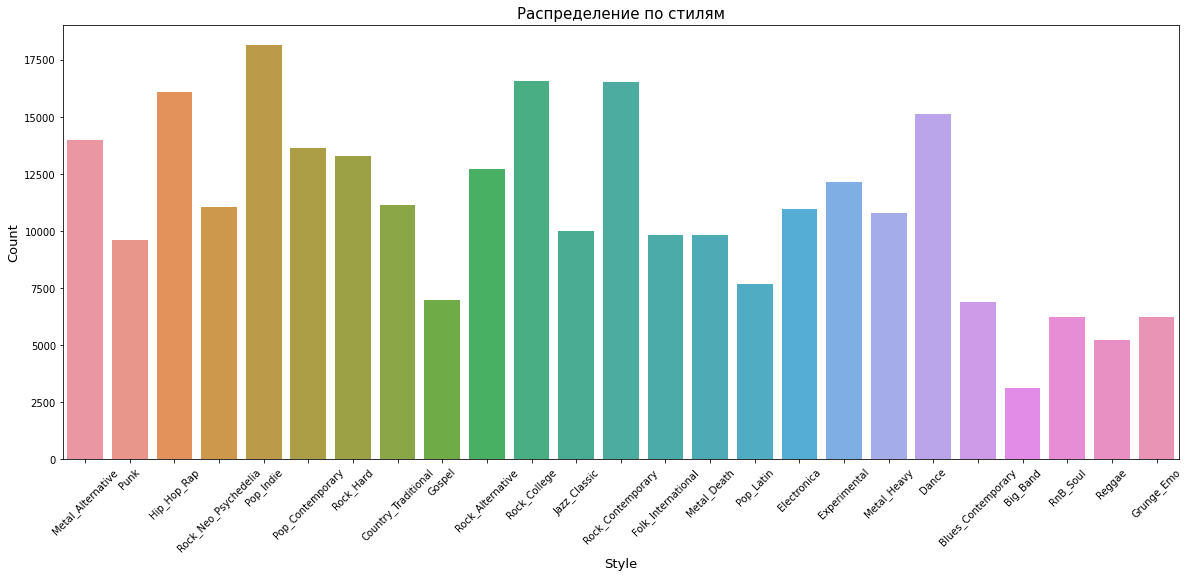

In [41]:
fig = plt.figure(figsize = (20, 8))

ax = sns.countplot(x='style', data=song_style);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

plt.title('Распределение по стилям', fontsize=15)
plt.ylabel('Count', fontsize=13);
plt.xlabel('Style', fontsize=13);

In [42]:
unique_tracks_gnr = pd.merge(unique_tracks, song_seed_genre, on='track_id', how='outer')
unique_tracks_gnr_ = pd.merge(unique_tracks_gnr, song_genre, on='track_id', how='outer')
unique_tracks_gnr_stl = pd.merge(unique_tracks_gnr_, song_style, on='track_id', how='outer')
unique_tracks_gnr_stl.head()

,track_id,song_id,artist_name,song_title,seed_genre,genre,style
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night,NaN,NaN,NaN
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan,Pop,NaN,NaN
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever,Electronica/Dance,Electronic,Electronica
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés,NaN,International,NaN
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens,NaN,NaN,NaN


In [43]:
unique_tracks_gnr_stl.seed_genre = unique_tracks_gnr_stl['seed_genre'].fillna('No genre')
unique_tracks_gnr_stl.genre = unique_tracks_gnr_stl['genre'].fillna('No genre')
unique_tracks_gnr_stl.style = unique_tracks_gnr_stl['style'].fillna('No style')
unique_tracks_gnr_stl.head()

,track_id,song_id,artist_name,song_title,seed_genre,genre,style
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night,No genre,No genre,No style
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan,Pop,No genre,No style
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever,Electronica/Dance,Electronic,Electronica
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés,No genre,International,No style
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens,No genre,No genre,No style


In [44]:
unique_tracks_gnr_stl.shape

(996342, 7)

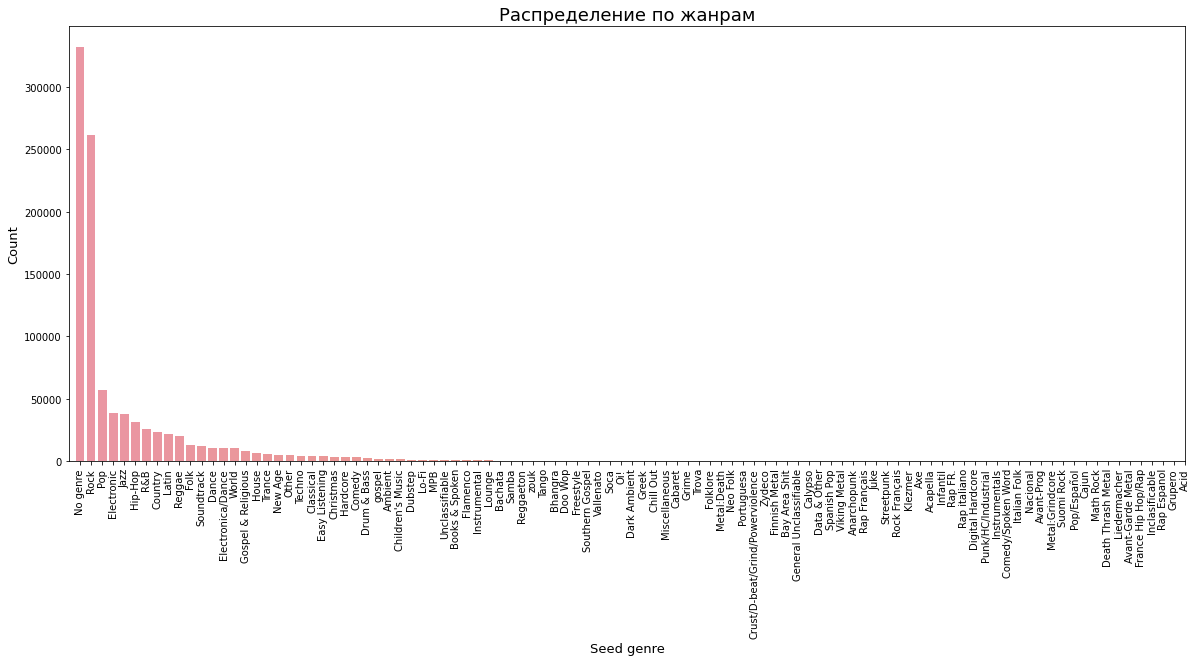

In [45]:
fig = plt.figure(figsize = (20, 8))

ax = sns.countplot(x='seed_genre', data=unique_tracks_gnr_stl, order=unique_tracks_gnr_stl['seed_genre'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.xlim(-1, 100)

plt.title('Распределение по жанрам', fontsize=18)
plt.ylabel('Count', fontsize=13);
plt.xlabel('Seed genre', fontsize=13);

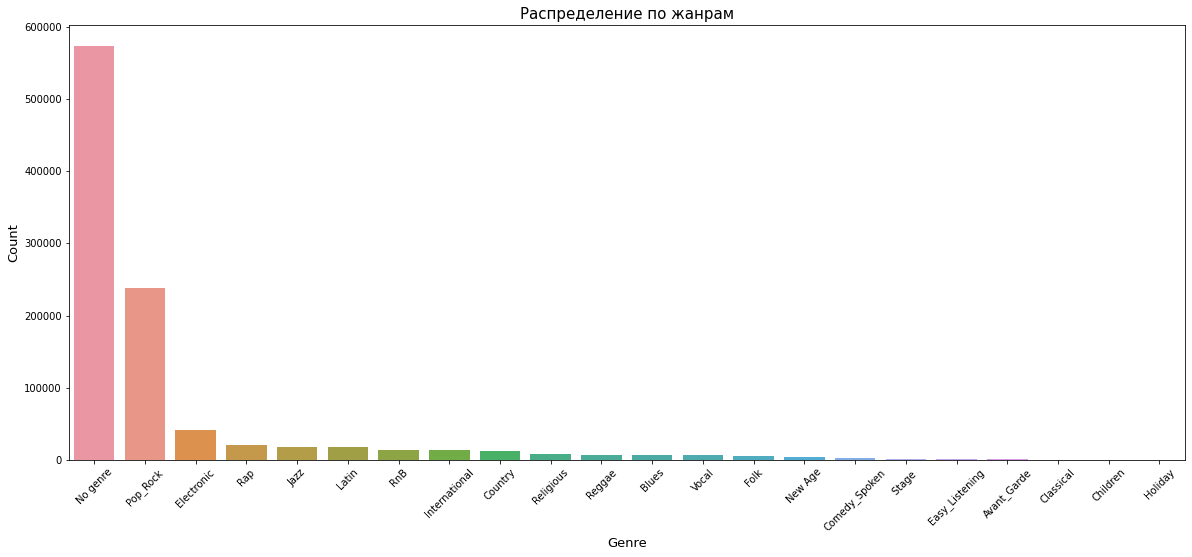

In [46]:
fig = plt.figure(figsize = (20, 8))

ax = sns.countplot(x='genre', data=unique_tracks_gnr_stl, order=unique_tracks_gnr_stl['genre'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

plt.title('Распределение по жанрам', fontsize=15)
plt.ylabel('Count', fontsize=13);
plt.xlabel('Genre', fontsize=13);

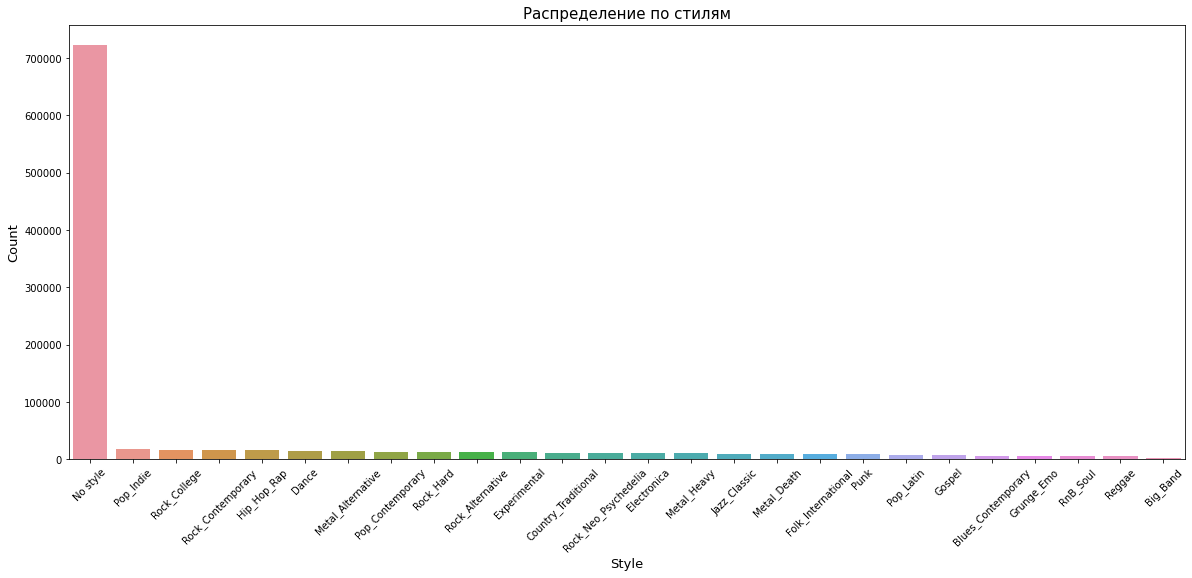

In [47]:
fig = plt.figure(figsize = (20, 8))

ax = sns.countplot(x='style', data=unique_tracks_gnr_stl, order=unique_tracks_gnr_stl['style'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

plt.title('Распределение по стилям', fontsize=15)
plt.ylabel('Count', fontsize=13);
plt.xlabel('Style', fontsize=13);

In [48]:
unique_tracks_gnr_stl[(unique_tracks_gnr_stl.seed_genre == 'No genre') & \
                      (unique_tracks_gnr_stl.genre == 'No genre') & \
                      (unique_tracks_gnr_stl['style'] == 'No style')].shape

(217234, 7)

### Объединение song_data и unique_tracks

In [49]:
song_df = pd.merge(unique_tracks_gnr_stl.drop(['artist_name', 'song_title'], axis=1), song_data, on='song_id', how='inner')

In [50]:
song_df.head()

,track_id,song_id,seed_genre,genre,style,title,release,artist_name,year
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,No genre,No genre,No style,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Pop,No genre,No style,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Electronica/Dance,Electronic,Electronica,No One Could Ever,Butter,Hudson Mohawke,2006
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,No genre,International,No style,Si Vos Querés,De Culo,Yerba Brava,2003
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,No genre,No genre,No style,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [51]:
song_df.shape

(980144, 9)

### Объединение всех датасетов

In [52]:
user_song_df = pd.merge(triplets_data, song_df, on='song_id', how='inner')

In [53]:
user_song_df.shape

(45795099, 11)

In [54]:
user_song_df.head()

,user_id,song_id,play_count,track_id,seed_genre,genre,style,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,R&B,No genre,No style,Nothing from Nothing,To Die For,Billy Preston,1974
1,fd13b9d49c54e00ff413fe3c095ba581c7fc611e,SOAPDEY12A81C210A9,8,TRIRLYL128F42539D1,R&B,No genre,No style,Nothing from Nothing,To Die For,Billy Preston,1974
2,35752a9e4d917c8fc5da88e90c25adc6b52220b6,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,R&B,No genre,No style,Nothing from Nothing,To Die For,Billy Preston,1974
3,bfe8d6d1e32d9de12c632d68712e7e4a23416e93,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,R&B,No genre,No style,Nothing from Nothing,To Die For,Billy Preston,1974
4,46d3ef1b4f317aba8f0226e937c67ecef9fa2e42,SOAPDEY12A81C210A9,4,TRIRLYL128F42539D1,R&B,No genre,No style,Nothing from Nothing,To Die For,Billy Preston,1974
